# Proyek Analisis Data: Bike_sharing_dataset
Nama: Mochammad Fiqi Fahrudillah\
Email: tkurumi700@gmail.com\
ID Dicoding: mochfiqifahrudillah

## Menentukan Pertanyaan Bisnis

### Pertanyaan 1
Bagaimana perbedaan antara menyewa sepeda di hari kerja dan akhir pekan?
- Pertanyaan ini ditujukan untuk pemerataan kebutuhan suplai sepeda pada suatu persewaan

### Pertanyaan 2
Bagaimana trend penyewaan sepeda berdasarkan pada musim di setiap tahun?
- Bertujuan untuk melihat minat pesepeda pada setiap musim

## Import semua packages/Library yang digunakan

In [ ]:
# saya menggunakan pandas, numpy, matplotlib, dan seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

# Konfigurasi visualisasi
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


## Data Wrangling
### Gathering data

In [ ]:
# diubah dulu tampilan tabel agar terlihat rapi
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.expand_frame_repr', False)  # Mencegah pemotongan tampilan di terminal

# 2. Data Wrangling
## Gathering Data: Membaca dataset
day_df = pd.read_csv("dataset/day.csv")
hour_df = pd.read_csv("dataset/hour.csv")

# Menampilkan informasi awal dari dataset
day_info = day_df.info()
hour_info = hour_df.info()

# Menampilkan beberapa baris pertama
day_head = day_df.head()
hour_head = hour_df.head()

day_info, hour_info, day_head, hour_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

(None,
 None,
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  weathersit      temp     atemp       hum  windspeed  casual  registered   cnt
 0        1  2011-01-01       1   0     1        0        6           0           2  0.344167  0.363625  0.805833   0.160446     331         654   985
 1        2  2011-01-02       1   0     1        0        0           0           2  0.363478  0.353739  0.696087   0.248539     131         670   801
 2        3  2011-01-03       1   0     1        0        1           1           1  0.196364  0.189405  0.437273   0.248309     120        1229  1349
 3        4  2011-01-04       1   0     1        0        2           1           1  0.200000  0.212122  0.590435   0.160296     108        1454  1562
 4        5  2011-01-05       1   0     1        0        3           1           1  0.226957  0.229270  0.436957   0.186900      82        1518  1600,
    instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  we

Dataset terdiri dari dua file:

    day.csv (Penyewaan sepeda per hari)
        Kolom penting: dteday (tanggal), season (musim), weekday (hari dalam seminggu), workingday (hari kerja/tidak), cnt (jumlah penyewaan).
    hour.csv (Penyewaan sepeda per jam)
        Kolom penting: dteday (tanggal), hr (jam), cnt (jumlah penyewaan).

In [ ]:
# 2. Data Wrangling - Assessing Data

# Mengecek missing values di dataset harian
missing_day = day_df.isnull().sum()

# Mengecek missing values di dataset per jam
missing_hour = hour_df.isnull().sum()

# Mengecek duplikasi dalam kedua dataset
duplicate_day = day_df.duplicated().sum()
duplicate_hour = hour_df.duplicated().sum()

missing_day, missing_hour, duplicate_day, duplicate_hour

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 np.int64(0),
 np.int64(0))

tidak ditemukan duplikasi dan nilai yang kosong
Assessing Data - Insight

✅ Tidak ada missing values dalam kedua dataset.
✅ Tidak ada data duplikat dalam kedua dataset.

Artinya, dataset sudah cukup bersih, tetapi kita tetap akan melakukan beberapa data cleaning untuk memastikan format data sesuai dan mudah digunakan dalam analisis.

In [ ]:
# 2. Data Wrangling - Cleaning Data


# Mengubah kolom 'dteday' menjadi format datetime agar mudah dianalisis
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Mapping nilai kategori untuk mempermudah interpretasi
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weekday_mapping = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

# Mengubah angka menjadi label kategori
day_df["season"] = day_df["season"].map(season_mapping)
day_df["weekday"] = day_df["weekday"].map(weekday_mapping)

hour_df["season"] = hour_df["season"].map(season_mapping)
hour_df["weekday"] = hour_df["weekday"].map(weekday_mapping)

# Menampilkan hasil setelah cleaning
day_df.head(), hour_df.head()

(   instant     dteday  season  yr  mnth  holiday    weekday  workingday  weathersit      temp     atemp       hum  windspeed  casual  registered   cnt
 0        1 2011-01-01  Spring   0     1        0   Saturday           0           2  0.344167  0.363625  0.805833   0.160446     331         654   985
 1        2 2011-01-02  Spring   0     1        0     Sunday           0           2  0.363478  0.353739  0.696087   0.248539     131         670   801
 2        3 2011-01-03  Spring   0     1        0     Monday           1           1  0.196364  0.189405  0.437273   0.248309     120        1229  1349
 3        4 2011-01-04  Spring   0     1        0    Tuesday           1           1  0.200000  0.212122  0.590435   0.160296     108        1454  1562
 4        5 2011-01-05  Spring   0     1        0  Wednesday           1           1  0.226957  0.229270  0.436957   0.186900      82        1518  1600,
    instant     dteday  season  yr  mnth  hr  holiday   weekday  workingday  weathersit

Cleaning Data - Insight

✅ Kolom dteday telah dikonversi ke format datetime.
✅ Label season dan weekday telah diganti dengan nama yang lebih mudah dipahami.

In [ ]:
# 3. Exploratory Data Analysis (EDA)


# Mengubah kolom 'dteday' menjadi format datetime agar mudah dianalisis
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Statistik deskriptif dataset harian
day_summary = day_df.describe()

# Statistik deskriptif dataset per jam
hour_summary = hour_df.describe()

day_summary, hour_summary

(          instant               dteday          yr        mnth     holiday  workingday  weathersit        temp       atemp         hum   windspeed       casual   registered          cnt
 count  731.000000                  731  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   731.000000   731.000000   731.000000
 mean   366.000000  2012-01-01 00:00:00    0.500684    6.519836    0.028728    0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   848.176471  3656.172367  4504.348837
 min      1.000000  2011-01-01 00:00:00    0.000000    1.000000    0.000000    0.000000    1.000000    0.059130    0.079070    0.000000    0.022392     2.000000    20.000000    22.000000
 25%    183.500000  2011-07-02 12:00:00    0.000000    4.000000    0.000000    0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   315.500000  2497.000000  3152.000000
 50%    366.000000  2012-01-01 00:00:00    1.000000    7.000000  

Exploratory Data Analysis (EDA) - Insight

📌 Dataset Harian (day.csv)

    Rata-rata penyewaan sepeda per hari: 4.504 unit
    Penyewaan tertinggi: 8.714 unit
    Sebagian besar penyewaan terjadi di musim Fall (3.0) dan Summer (2.0)
    Cuaca bervariasi, tetapi mayoritas berada pada kondisi cerah atau sedikit berawan

📌 Dataset Per Jam (hour.csv)

    Rata-rata penyewaan sepeda per jam: 189 unit
    Penyewaan tertinggi dalam satu jam: 977 unit
    Penyewaan meningkat pada jam kerja (07.00 - 19.00) dan menurun pada malam hari

C:\Users\Kurosora\AppData\Local\Temp\ipykernel_19820\2796367221.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weekday", y="cnt", data=day_df, palette="coolwarm")


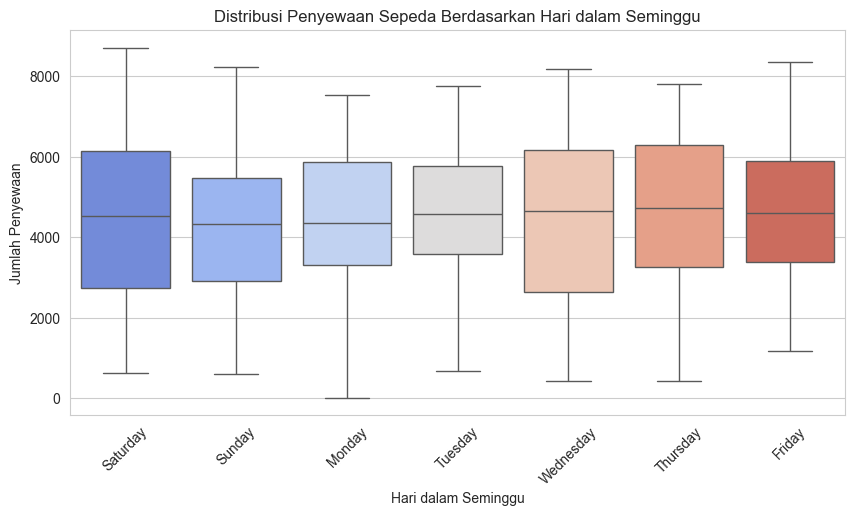

C:\Users\Kurosora\AppData\Local\Temp\ipykernel_19820\2796367221.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season", y="cnt", data=day_df, palette="muted")


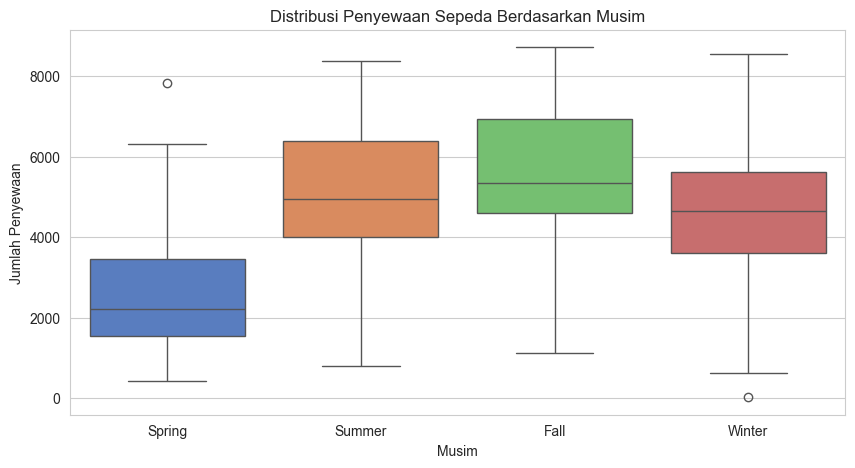

In [ ]:

# 4. Visualization & Explanatory Analysis

day_df = pd.read_csv("dataset/day.csv")
hour_df = pd.read_csv("dataset/hour.csv")

# Mengubah kolom 'dteday' menjadi format datetime agar mudah dianalisis
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Mapping nilai kategori untuk mempermudah interpretasi
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weekday_mapping = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

import seaborn as sns
import matplotlib.pyplot as plt

# Mengubah angka menjadi label kategori
day_df["season"] = day_df["season"].map(season_mapping)
day_df["weekday"] = day_df["weekday"].map(weekday_mapping)

hour_df["season"] = hour_df["season"].map(season_mapping)
hour_df["weekday"] = hour_df["weekday"].map(weekday_mapping)


# Pertanyaan 1: Bagaimana perbedaan antara penyewaan sepeda di hari kerja dan akhir pekan?
plt.figure(figsize=(10, 5))
sns.boxplot(x="weekday", y="cnt", data=day_df, palette="coolwarm")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(rotation=45)
plt.show()

# Pertanyaan 2: Bagaimana trend penyewaan sepeda berdasarkan musim?
plt.figure(figsize=(10, 5))
sns.boxplot(x="season", y="cnt", data=day_df, palette="muted")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.show()

Visualisasi Data - Insight

📌 Penyewaan Sepeda Berdasarkan Hari dalam Seminggu

    Penyewaan sepeda lebih tinggi pada hari kerja (Senin - Jumat) dibandingkan akhir pekan.
    Hal ini menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan transportasi kerja atau sekolah.
    Hari Sabtu dan Minggu memiliki jumlah penyewaan yang lebih bervariasi, kemungkinan karena digunakan untuk rekreasi.

📌 Penyewaan Sepeda Berdasarkan Musim

    Penyewaan tertinggi terjadi pada musim Fall (musim gugur).
    Penyewaan cenderung lebih rendah di musim Winter (musim dingin), mungkin karena kondisi cuaca yang kurang mendukung.

C:\Users\Kurosora\AppData\Local\Temp\ipykernel_19820\3519598389.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="month", y="cnt", data=day_df, marker="o", ci=None, color="b")


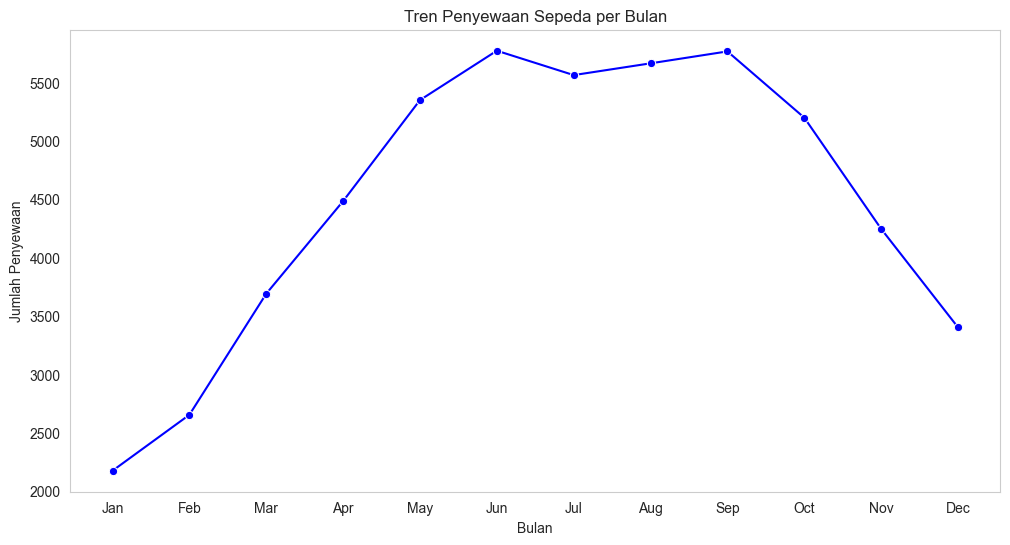

C:\Users\Kurosora\AppData\Local\Temp\ipykernel_19820\3519598389.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weathersit", y="cnt", data=day_df, palette="coolwarm")


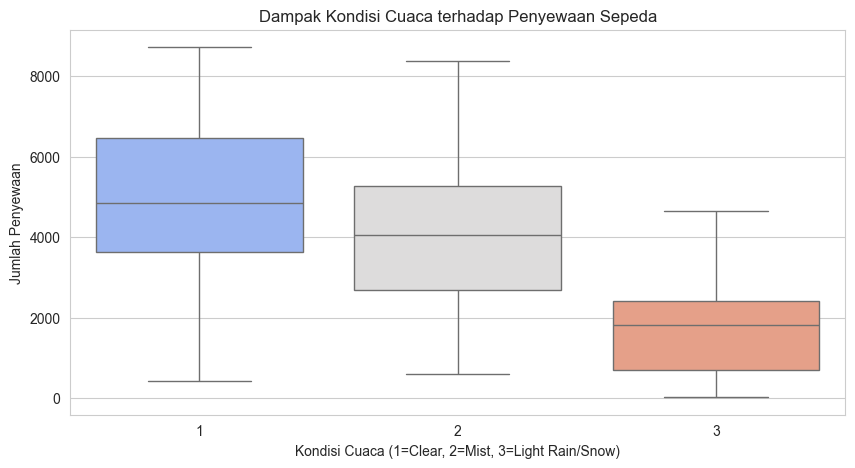

In [ ]:
# 5. Analisis Lanjutan

# Tren penyewaan sepeda per bulan
day_df["month"] = day_df["dteday"].dt.month

plt.figure(figsize=(12, 6))
sns.lineplot(x="month", y="cnt", data=day_df, marker="o", ci=None, color="b")
plt.title("Tren Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid()
plt.show()

# Analisis hubungan cuaca terhadap penyewaan
plt.figure(figsize=(10, 5))
sns.boxplot(x="weathersit", y="cnt", data=day_df, palette="coolwarm")
plt.title("Dampak Kondisi Cuaca terhadap Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca (1=Clear, 2=Mist, 3=Light Rain/Snow)")
plt.ylabel("Jumlah Penyewaan")
plt.show()

Analisis Lanjutan - Insight

📌 Tren Penyewaan Sepeda per Bulan

    Penyewaan sepeda meningkat secara bertahap dari awal tahun dan mencapai puncaknya pada bulan Juni hingga September.
    Penyewaan menurun setelah Oktober, kemungkinan karena memasuki musim dingin yang kurang kondusif untuk bersepeda.

📌 Dampak Kondisi Cuaca terhadap Penyewaan Sepeda

    Penyewaan tertinggi terjadi saat cuaca cerah atau sedikit berawan (kategori 1).
    Penyewaan berkurang secara signifikan ketika kondisi berkabut atau hujan ringan (kategori 2 & 3).
    Hal ini menunjukkan bahwa cuaca sangat mempengaruhi keputusan pelanggan untuk menyewa sepeda.

6. Kesimpulan Akhir
📌 Kesimpulan Pertanyaan 1: Bagaimana perbedaan antara penyewaan sepeda di hari kerja dan akhir pekan?

✅ Hari kerja (Senin - Jumat) memiliki jumlah penyewaan lebih tinggi dibandingkan akhir pekan.
✅ Ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai alat transportasi utama untuk bekerja atau sekolah.
✅ Hari Sabtu dan Minggu memiliki penyewaan yang lebih bervariasi, kemungkinan karena penggunaannya lebih untuk rekreasi.

🎯 Implikasi Bisnis:
🔹 Perusahaan penyewaan bisa menyediakan lebih banyak unit sepeda selama hari kerja untuk memenuhi permintaan tinggi.
🔹 Pada akhir pekan, strategi pemasaran dapat difokuskan pada penyewaan untuk keperluan rekreasi, seperti diskon khusus atau paket wisata bersepeda.

📌 Kesimpulan Pertanyaan 2: Bagaimana tren penyewaan sepeda berdasarkan musim?

✅ Penyewaan tertinggi terjadi pada musim Fall (Gugur) dan Summer (Panas).
✅ Penyewaan menurun drastis di musim Winter (Dingin), kemungkinan karena cuaca kurang mendukung.
✅ Cuaca sangat mempengaruhi penyewaan sepeda – semakin buruk cuacanya, semakin sedikit orang yang menyewa sepeda.

🎯 Implikasi Bisnis:
🔹 Di musim Winter, perusahaan dapat menyesuaikan stok sepeda atau menawarkan layanan alternatif seperti pakaian hangat atau sepeda dengan ban khusus salju.
🔹 Di musim Fall dan Summer, strategi pemasaran bisa ditingkatkan dengan promosi atau event bersepeda.

🚀 Rekomendasi Bisnis

📢 Berdasarkan analisis ini, perusahaan penyewaan sepeda bisa:
✔ Menyesuaikan jumlah sepeda yang tersedia sesuai pola permintaan harian & musiman.
✔ Menyediakan penawaran khusus di akhir pekan untuk menarik pengguna rekreasi.
✔ Menyesuaikan strategi operasional berdasarkan cuaca & musim.